created train.txt with 140000 images!
created val.txt with 2000 images!
/home/herohunfer/PycharmProjects/homework/capstone/all/68157-8.jpg


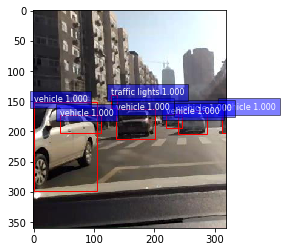

The box is [[312.0, 163.33344, 320.0, 202.66667999999999, 0], [238.49983999999998, 165.49991999999997, 286.66688, 204.83315999999996, 0], [219.16671999999997, 170.99999999999997, 245.66656, 193.49999999999997, 0], [136.49984, 163.00008, 200.66688000000002, 213.00012, 0], [127.66655999999999, 139.5, 138.49984, 160.33319999999998, 3], [0.33333311999999893, 150.83315999999996, 105.50016, 298.33344, 0], [44.250048, 173.25000000000003, 112.00063999999999, 201.99996000000002, 0]]
image size is (360, 320, 3)


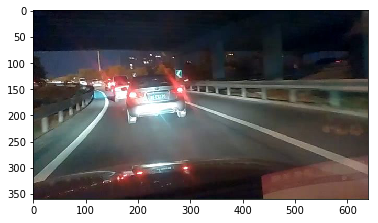

The box is []
image size is (360, 640, 3)


In [14]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import json
import operator
import os
from os import listdir, getcwd
from os.path import join

def convert_annotation(image_id, boxes):
    CLASSES = {1:0, 2:1, 3:2, 20:3}
    WIDTH = 640
    HEIGHT = 360
    out_file = open('all/%s.txt'%(image_id), 'w')
    for box in v:
        xmin, ymin, xmax, ymax,cls = box
        x1 = xmin
        y1 = ymin
        x2 = xmax
        y2 = ymax
        dw = 1./WIDTH
        dh = 1./HEIGHT
        cx = (x2+x1)/2.*dw
        cy = (y2+y1)/2.*dh
        w = (x2-x1)*dw
        h = (y2-y1)*dh
        out_file.write(str(CLASSES[cls]) + " " + " ".join([str(a) for a in [cx, cy, w, h]]) + '\n')
    out_file.close()
################ CONVERTING #######################
wd = getcwd()
with open('all/all_label.idl') as f:
    if not os.path.exists('all/'):
        os.makedirs('all/')
    
    lines = f.read().splitlines()
    annotations = {}
    for line in lines:
        annotation = json.loads(line)
        annotations.update(annotation) 
    imglist = annotations.keys()
    #training_size = int(len(imglist)*.5)
    i = 0
    train_file = open("train.txt", 'w')
    
    if not os.path.exists('all/'):
        os.makedirs('all')
        
    for k,v in annotations.items():
        i += 1
        image_id = k.split('.')[0]
        
        #if i < training_size:
        train_file.write(os.path.join(wd,'all', '%s.jpg'%(image_id))+'\n')
        #else:
        #    val_file.write('%s/all/%s.jpg\n'%(wd, image_id))
        convert_annotation(image_id, v)
        #if i == 5:
        #    break
    train_file.close()
    print "created train.txt with %d images!" %(i)
    extension = 'jpg'
    i = 0
    # validation is actual testing here
    val_file = open("val.txt", 'w')
    for dir_path, sub_dir_paths, files in os.walk('%s/testing'%(wd)):
            for f in files:
                if f.endswith(extension):
                    i += 1
                    val_file.write(os.path.join(dir_path, f)+'\n')
                    #if i == 5:
                    #    break
    val_file.close()
    print "created val.txt with %d images!" %(i)
################ TESTING ####################### 
WIDTH = 640
HEIGHT = 360
def draw(imgfile, box):
    CLASSES = {0:"vehicle", 1:"pedestrian", 2:"cyclist", 3:"traffic lights"}
    img = plt.imread("{}".format(imgfile))
    # Create figure and axes
    fig,ax = plt.subplots(1)
    ax.imshow(img)
    for eachbox in box:
        xmin, ymin, xmax, ymax,cls = eachbox 
    
        # Create a Rectangle patch, bottom left, width, height
        rect = patches.Rectangle((xmin,ymin),xmax-xmin,ymax-ymin,linewidth=1,edgecolor='r',facecolor='none', label=CLASSES[cls])

        # Add the patch to the Axes
        ax.add_patch(rect)

        plt.gca().text(xmin, ymin,
                        '{:s} {:.3f}'.format(CLASSES[cls], 1.0),
                        bbox=dict(facecolor='blue', alpha=0.5),
                        fontsize=8, color='white')
    plt.show()
    print "The box is {}".format(box)
    print "image size is {}".format(img.shape)
    
# double check with one file
with open('train.txt', 'r') as f:
    # get a viusalization 
    lines = f.read().splitlines()
    imgfile = lines[2]
    print imgfile
    annotation_file = "try/"+imgfile.split('/')[-1].split(".")[0] + ".txt"
    annotation = open(annotation_file, 'r')
    annotation_lines = annotation.read().splitlines()
    box = []
    for line in annotation_lines:
        cls, cx,cy,w,h = [float(a) for a in line.split()]
        cls = int(cls)
        dw = 1./WIDTH
        dh = 1./HEIGHT
        xmin = (cx-w/2.)/dw
        xmax = (cx+w/2.)/dw
        ymin = (cy-h/2.)/dh
        ymax = (cy+h/2.)/dh
        box.append([xmin, ymin, xmax, ymax, cls])
    draw(imgfile, box)
with open('val.txt', 'r') as f:
    # get a viusalization 
    lines = f.read().splitlines()
    imgfile = lines[2]
    box = []
    draw(imgfile, box)

In [13]:
import os
from os import listdir, getcwd
wd = getcwd()
extension = 'jpg'

for dir_path, sub_dir_paths, files in os.walk('%s/testing'%(wd)):
            for f in files:
                if f.endswith(extension):
                    
                    print f, os.path.join(dir_path, f)
                    if i is 5:
                        break
image_id = 70626
print os.path.join(wd,'all', '%s.jpg\n'%(image_id))

70626.jpg /home/herohunfer/PycharmProjects/homework/capstone/testing/70626.jpg
/home/herohunfer/PycharmProjects/homework/capstone/all/70626.jpg

